In [46]:
import pandas as pd
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [47]:
# Load the dataset
file_path = 'GroceryDataset.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
data.head()


,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [48]:
# Check for missing values
missing_values = data.isnull().sum()
# Check data types
data_types = data.dtypes
missing_values, data_types


(Sub Category              0
 Price                     3
 Discount                  0
 Rating                 1075
 Title                     0
 Currency                  5
 Feature                  18
 Product Description      42
 dtype: int64,
 Sub Category           object
 Price                  object
 Discount               object
 Rating                 object
 Title                  object
 Currency               object
 Feature                object
 Product Description    object
 dtype: object)

In [49]:
# Function to handle price values, including ranges
def handle_price(value):
    try:
        # If the value is a range, calculate the average
        if 'through' in value:
            low, high = value.replace('$', '').split('through-')
            return (float(low) + float(high)) / 2
        # Otherwise, just convert to float
        return float(value.replace('$', ''))
    except:
        # If there's any error, return NaN to handle it later
        return np.nan

# Apply the function to the 'Price' column
data['Price'] = data['Price'].apply(lambda x: handle_price(x) if pd.notnull(x) else x)

# Now, let's handle missing 'Price' by filling with the median value (to avoid influence of outliers)
price_median = data['Price'].median()
data['Price'].fillna(price_median, inplace=True)

# Recheck if operations were successful
data[['Price']].isnull().sum(), data[['Price']].dtypes


(Price    0
 dtype: int64,
 Price    float64
 dtype: object)

In [50]:
# Function to extract rating value
def extract_rating(rating_str):
    try:
        rating_match = re.search(r"Rated (\d+\.\d+|\d+) out of", rating_str)
        if rating_match:
            return float(rating_match.group(1))
    except:
        return np.nan

# Function to extract number of reviews
def extract_reviews(rating_str):
    try:
        reviews_match = re.search(r"based on (\d+) reviews", rating_str)
        if reviews_match:
            return int(reviews_match.group(1))
    except:
        return np.nan

# Apply functions to the 'Rating' column
data['Average_Rating'] = data['Rating'].apply(lambda x: extract_rating(x) if pd.notnull(x) else x)
data['Number_of_Reviews'] = data['Rating'].apply(lambda x: extract_reviews(x) if pd.notnull(x) else x)

# Check the extraction and missing values after extraction
data[['Average_Rating', 'Number_of_Reviews']].isnull().sum(), data[['Average_Rating', 'Number_of_Reviews']].dtypes


(Average_Rating       1140
 Number_of_Reviews    1140
 dtype: int64,
 Average_Rating       float64
 Number_of_Reviews    float64
 dtype: object)

In [51]:
# Dropping the 'Currency', 'Feature', 'Product Description' columns
data_cleaned = data.drop(['Currency', 'Feature', 'Product Description'], axis=1)

# Display the first few rows of the cleaned dataset to confirm the columns are dropped
data_cleaned.head()


,Sub Category,Price,Discount,Rating,Title,Average_Rating,Number_of_Reviews
0,Bakery & Desserts,56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",4.3,265.0
1,Bakery & Desserts,159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",5.0,1.0
2,Bakery & Desserts,44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",4.1,441.0
3,Bakery & Desserts,39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",4.7,9459.0
4,Bakery & Desserts,59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",4.5,758.0


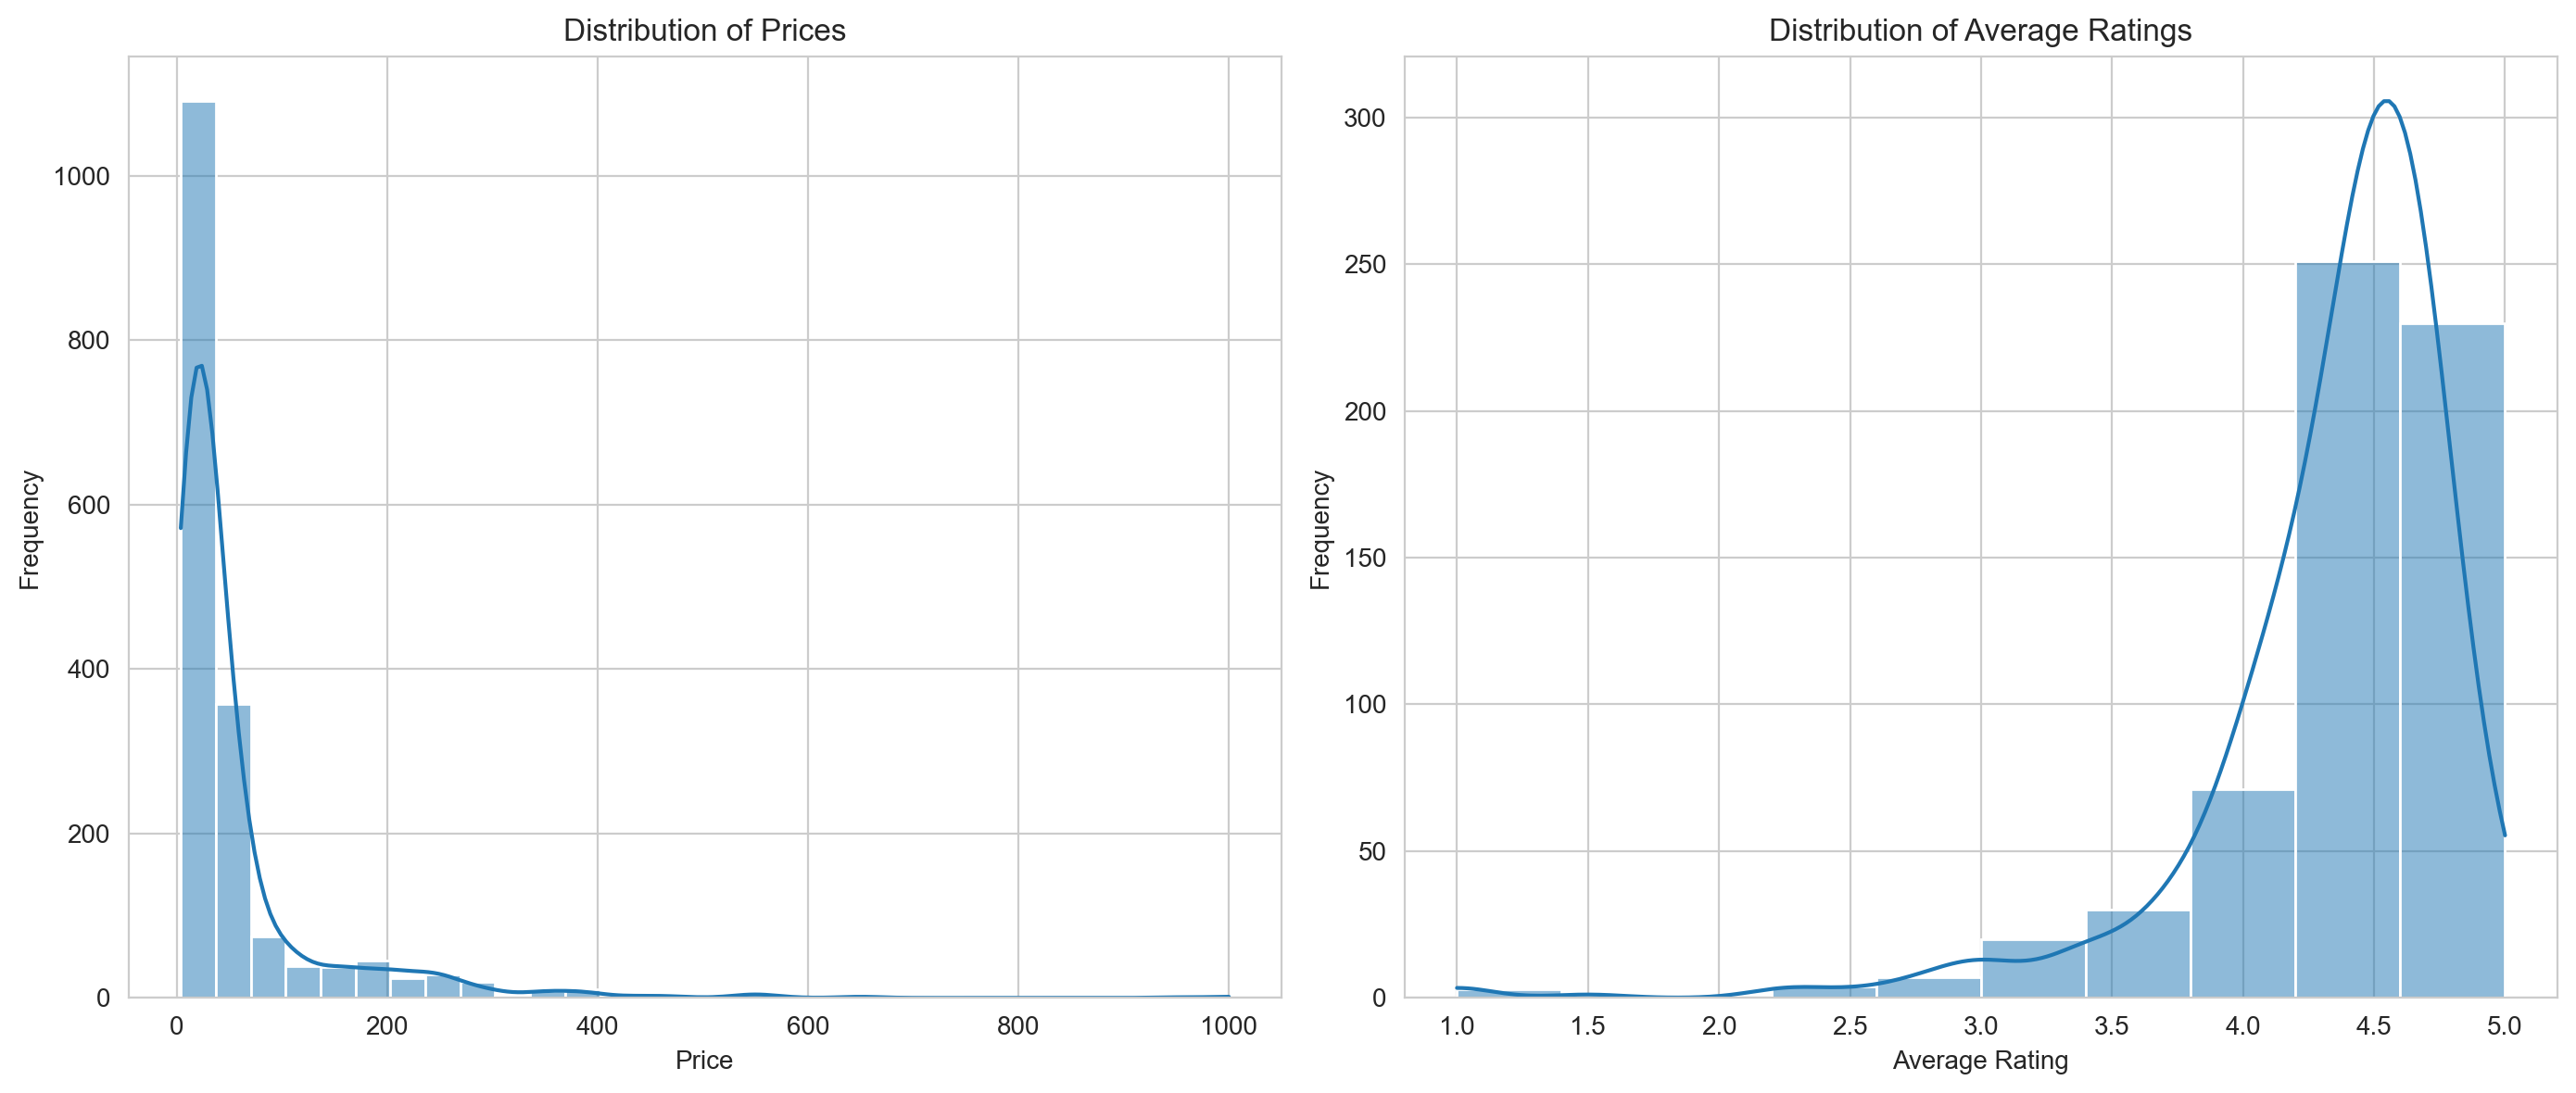

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Prices
plt.figure(figsize=(14, 6), dpi=200)
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Distribution of Average Ratings
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['Average_Rating'].dropna(), bins=10, kde=True)  # Drop NA for valid histogram
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


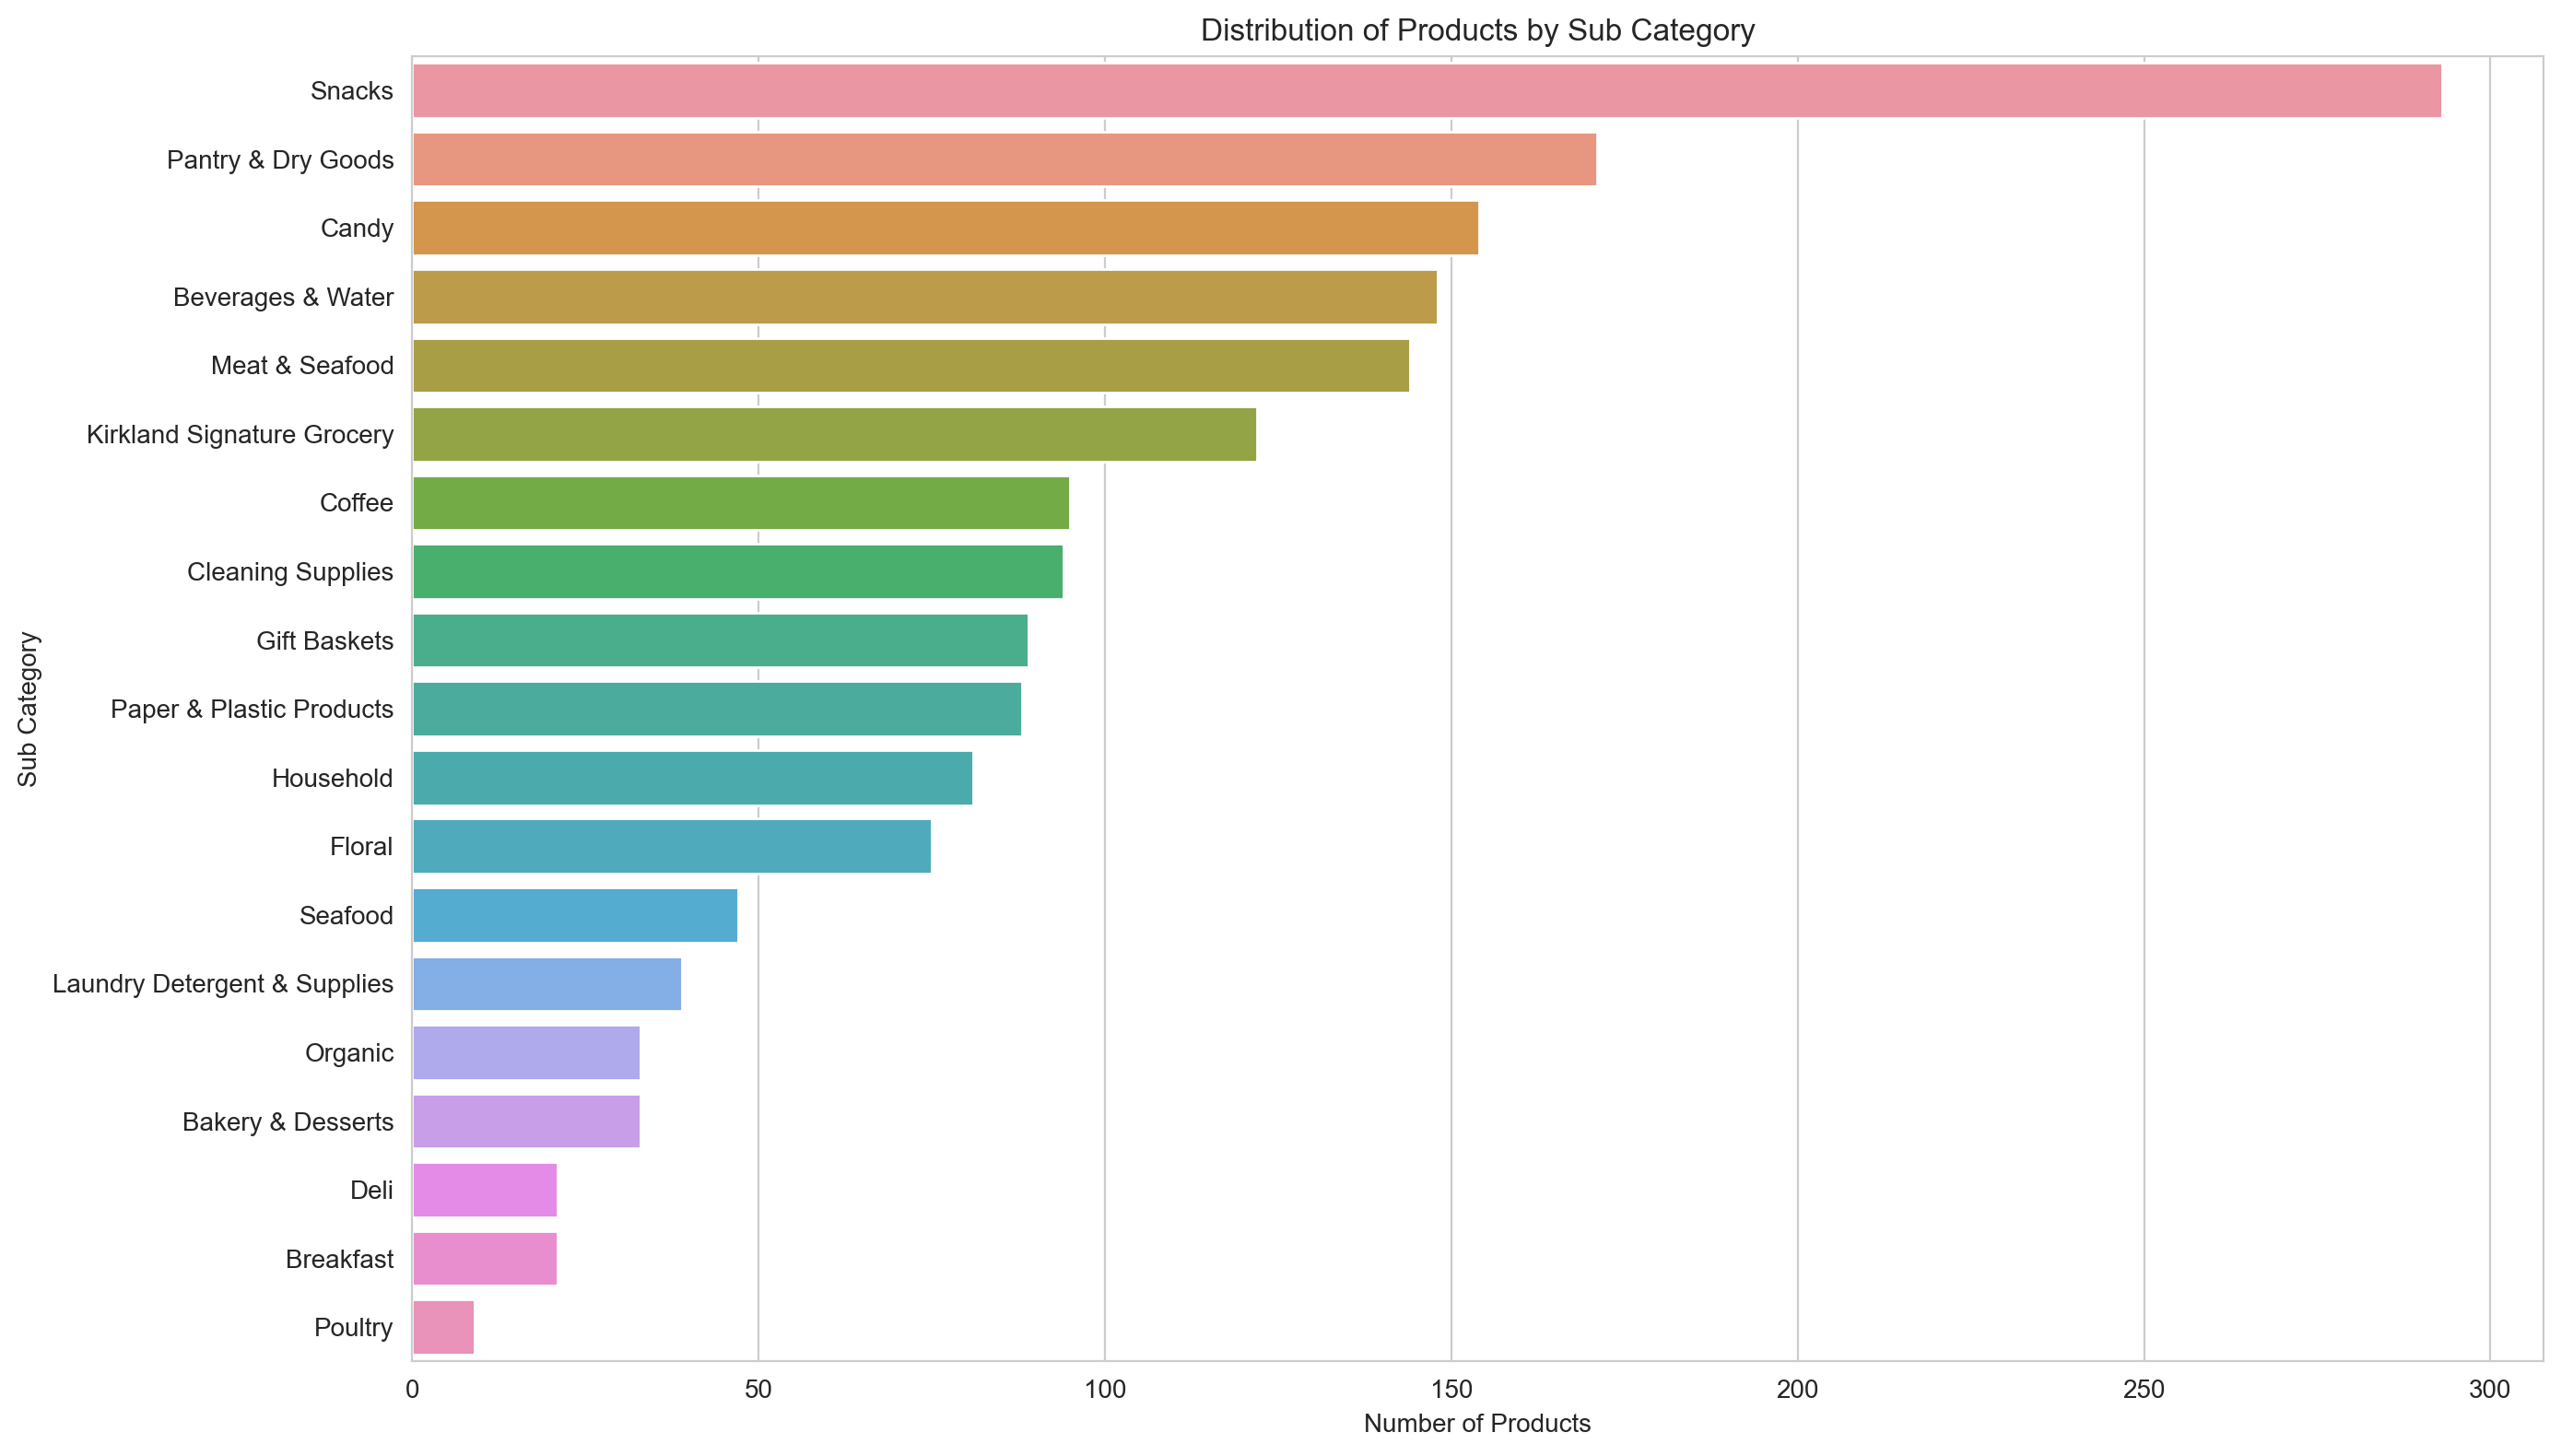

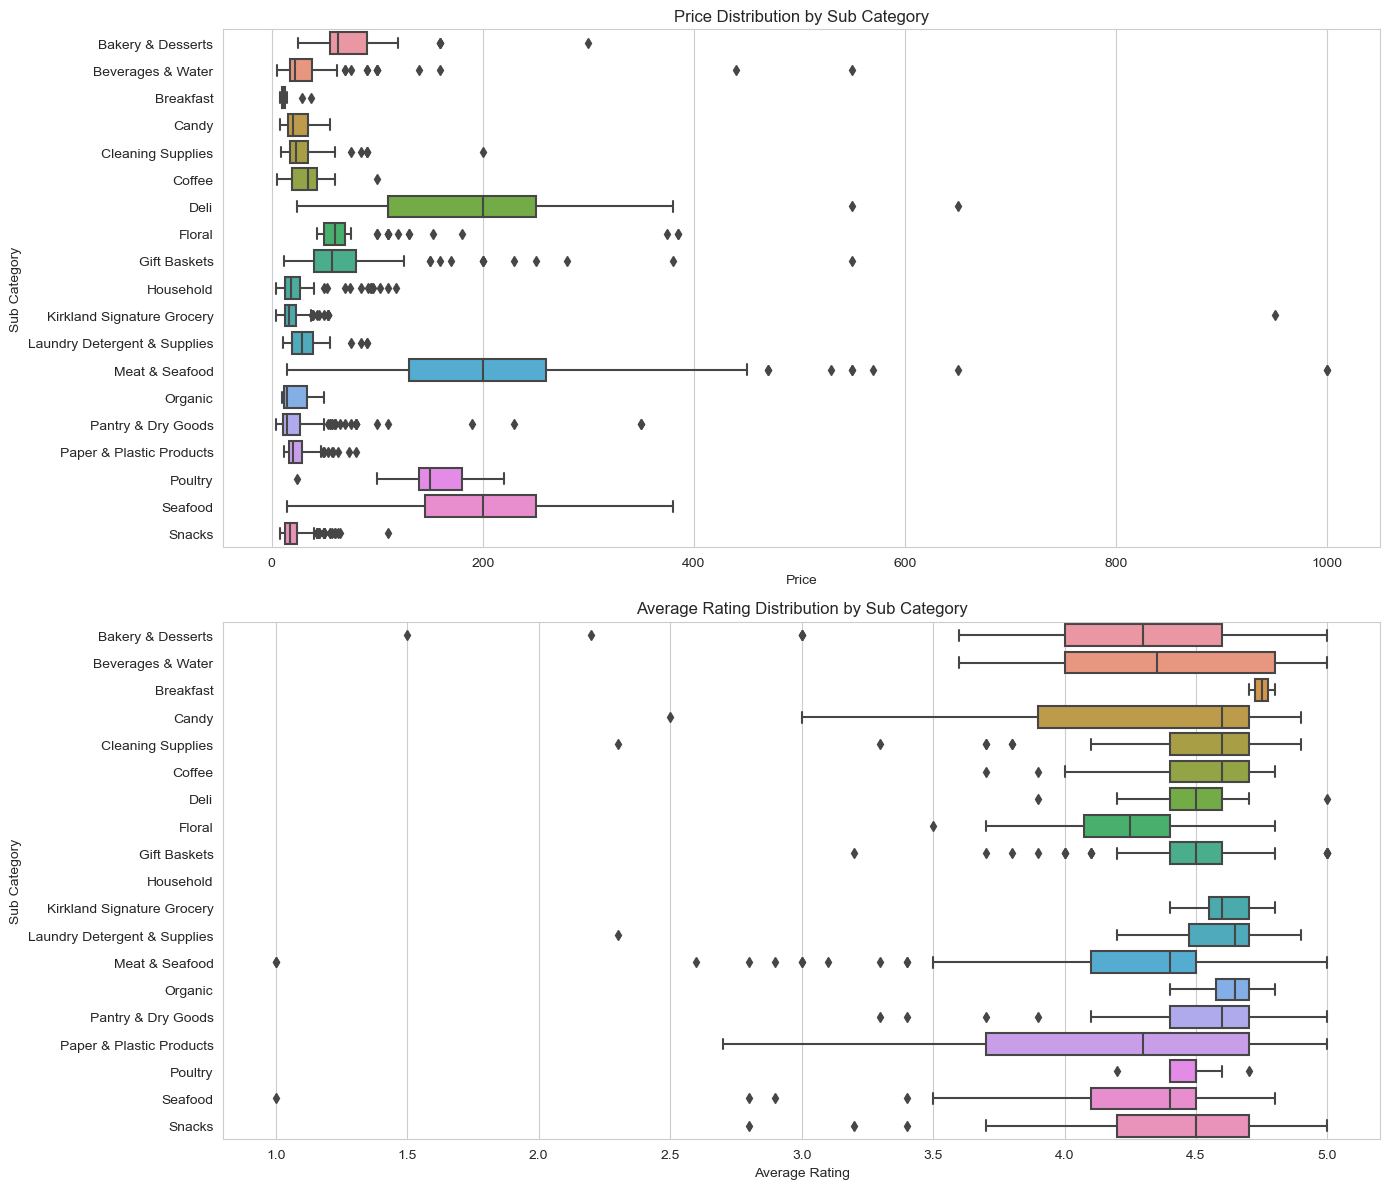

In [53]:
plt.figure(figsize=(14, 8), dpi=200)

# Count plot for Sub Categories
sns.countplot(data=data_cleaned, y='Sub Category', order = data_cleaned['Sub Category'].value_counts().index)
plt.title('Distribution of Products by Sub Category')
plt.xlabel('Number of Products')
plt.ylabel('Sub Category')

plt.tight_layout()
plt.show()

# Box plots for Prices and Ratings by Sub Category
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

sns.boxplot(data=data_cleaned, y='Sub Category', x='Price', ax=axes[0])
axes[0].set_title('Price Distribution by Sub Category')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Sub Category')

sns.boxplot(data=data_cleaned, y='Sub Category', x='Average_Rating', ax=axes[1])
axes[1].set_title('Average Rating Distribution by Sub Category')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Sub Category')

plt.tight_layout()
plt.show()


In [54]:
data_cleaned['Discount'].unique()

array(['No Discount', 'After $30 OFF', 'After $5 OFF',
       'This item is not returnable.', 'After $20 OFF', 'After $4.50 OFF',
       'After $4 OFF', 'After $2.80 OFF', 'After $8 OFF',
       'After $3.60 OFF', 'After $3 OFF', 'After $1.50 OFF',
       'After $3.30 OFF', 'After $6 OFF', 'After $2.40 OFF',
       'After $2.20 OFF', 'After $12 OFF', 'After $3.10 OFF',
       'After $5.60 OFF', 'After $2.70 OFF', 'After $10 OFF',
       'After $9.30 OFF', 'After $50 OFF', 'After $2.50 OFF',
       'After $70 OFF', 'After $60 OFF', 'After $40 - $80 OFF',
       'After $40 - $70 OFF', 'After $40 OFF', 'After $80 OFF', '.',
       'After $3.50 OFF', 'Limit 1 Per Member', 'Limit 5 Per Member',
       'After $6.50 OFF', 'After $3.80 OFF', 'After $2.60 OFF',
       'After $7 OFF',
       'Costco Members Receive an Additional $5 OFF Caramel Peanut Protein Bars with FitCrunch through Costco Next',
       'After $4.10 OFF', 'After $2 OFF', 'After $2.30 OFF'], dtype=object)

In [55]:
# Function to categorize discounts into specified groups
def categorize_discount(discount_str):
    if 'No Discount' in discount_str or 'Costco' in discount_str:
        return 'No Discount/Limit'
    try:
        # Extract numeric value from the Discount string
        discount_value = float(re.findall(r'\d+', discount_str)[0])
        if discount_value >= 1 and discount_value <= 10:
            return '$1-10 OFF'
        elif discount_value >= 11 and discount_value <= 50:
            return '$11-50 OFF'
        elif discount_value >= 51:
            return 'After $51 OFF'
    except:
        return 'No Discount/Limit'  # Fallback for any exceptions or non-numeric values

# Apply the function to create a new 'Discount_Group' column
data_cleaned['Discount_Group'] = data_cleaned['Discount'].apply(categorize_discount)

# Verify the transformation by checking the distribution of the new discount groups
discount_group_counts = data_cleaned['Discount_Group'].value_counts()
discount_group_counts


Discount_Group
No Discount/Limit    1630
$1-10 OFF             103
$11-50 OFF             18
After $51 OFF           6
Name: count, dtype: int64

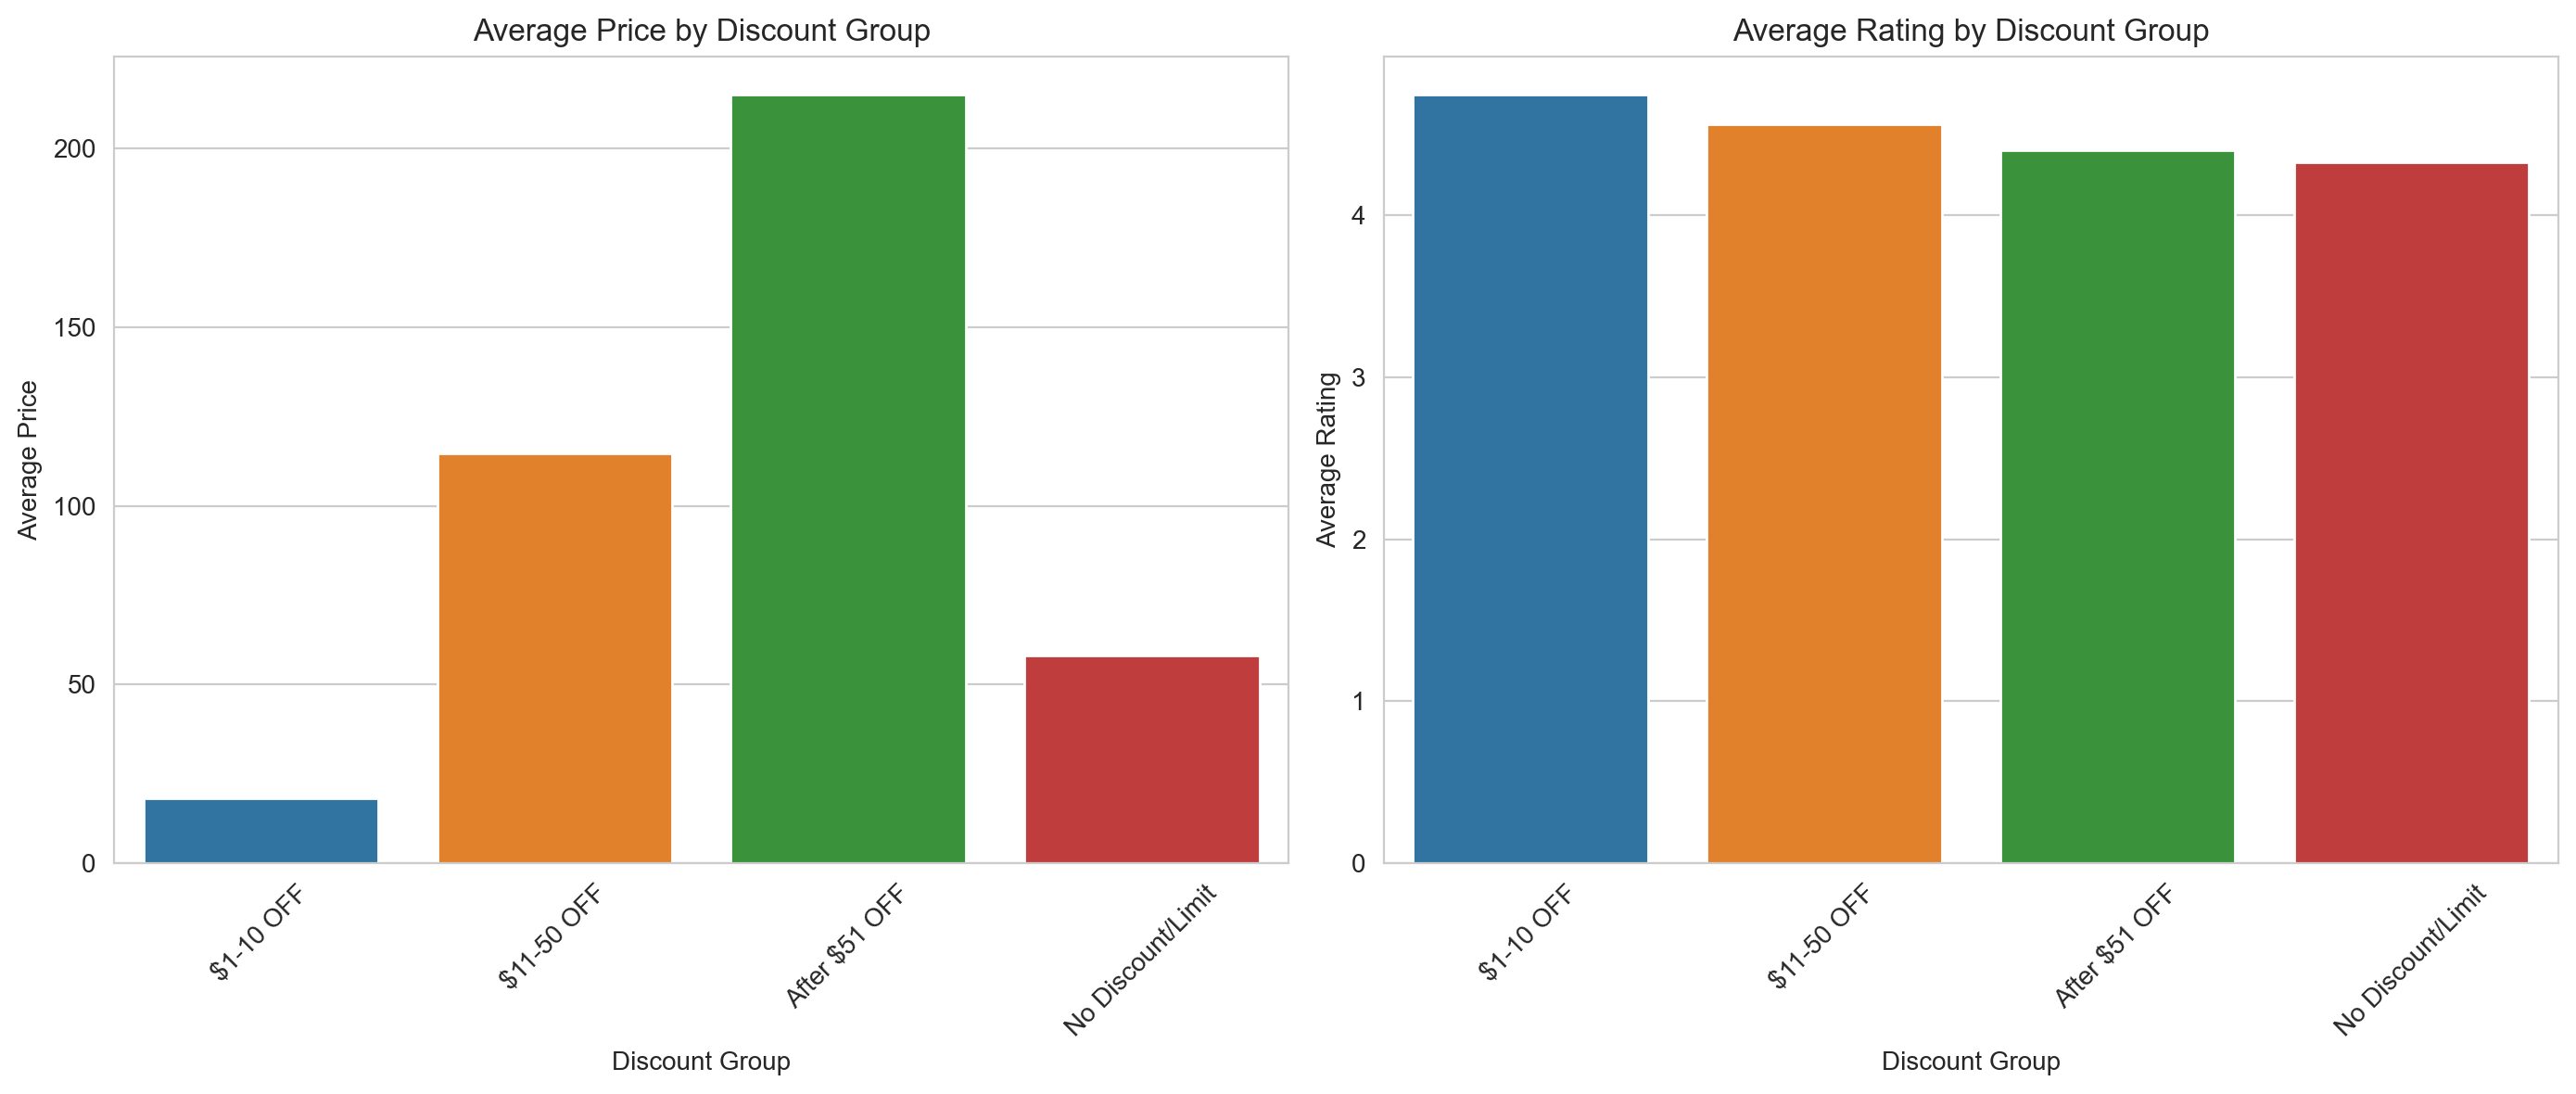

In [56]:
# Grouping data by 'Discount_Group' for visualization
discount_group_summary = data_cleaned.groupby('Discount_Group').agg(
    Average_Price=('Price', 'mean'),
    Average_Rating=('Average_Rating', 'mean')
).reset_index()

# Visualizing the impact of Discount Groups on Average Price and Average Rating
plt.figure(figsize=(14, 6), dpi=200)

plt.subplot(1, 2, 1)
sns.barplot(data=discount_group_summary, x='Discount_Group', y='Average_Price')
plt.title('Average Price by Discount Group')
plt.xlabel('Discount Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=discount_group_summary, x='Discount_Group', y='Average_Rating')
plt.title('Average Rating by Discount Group')
plt.xlabel('Discount Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


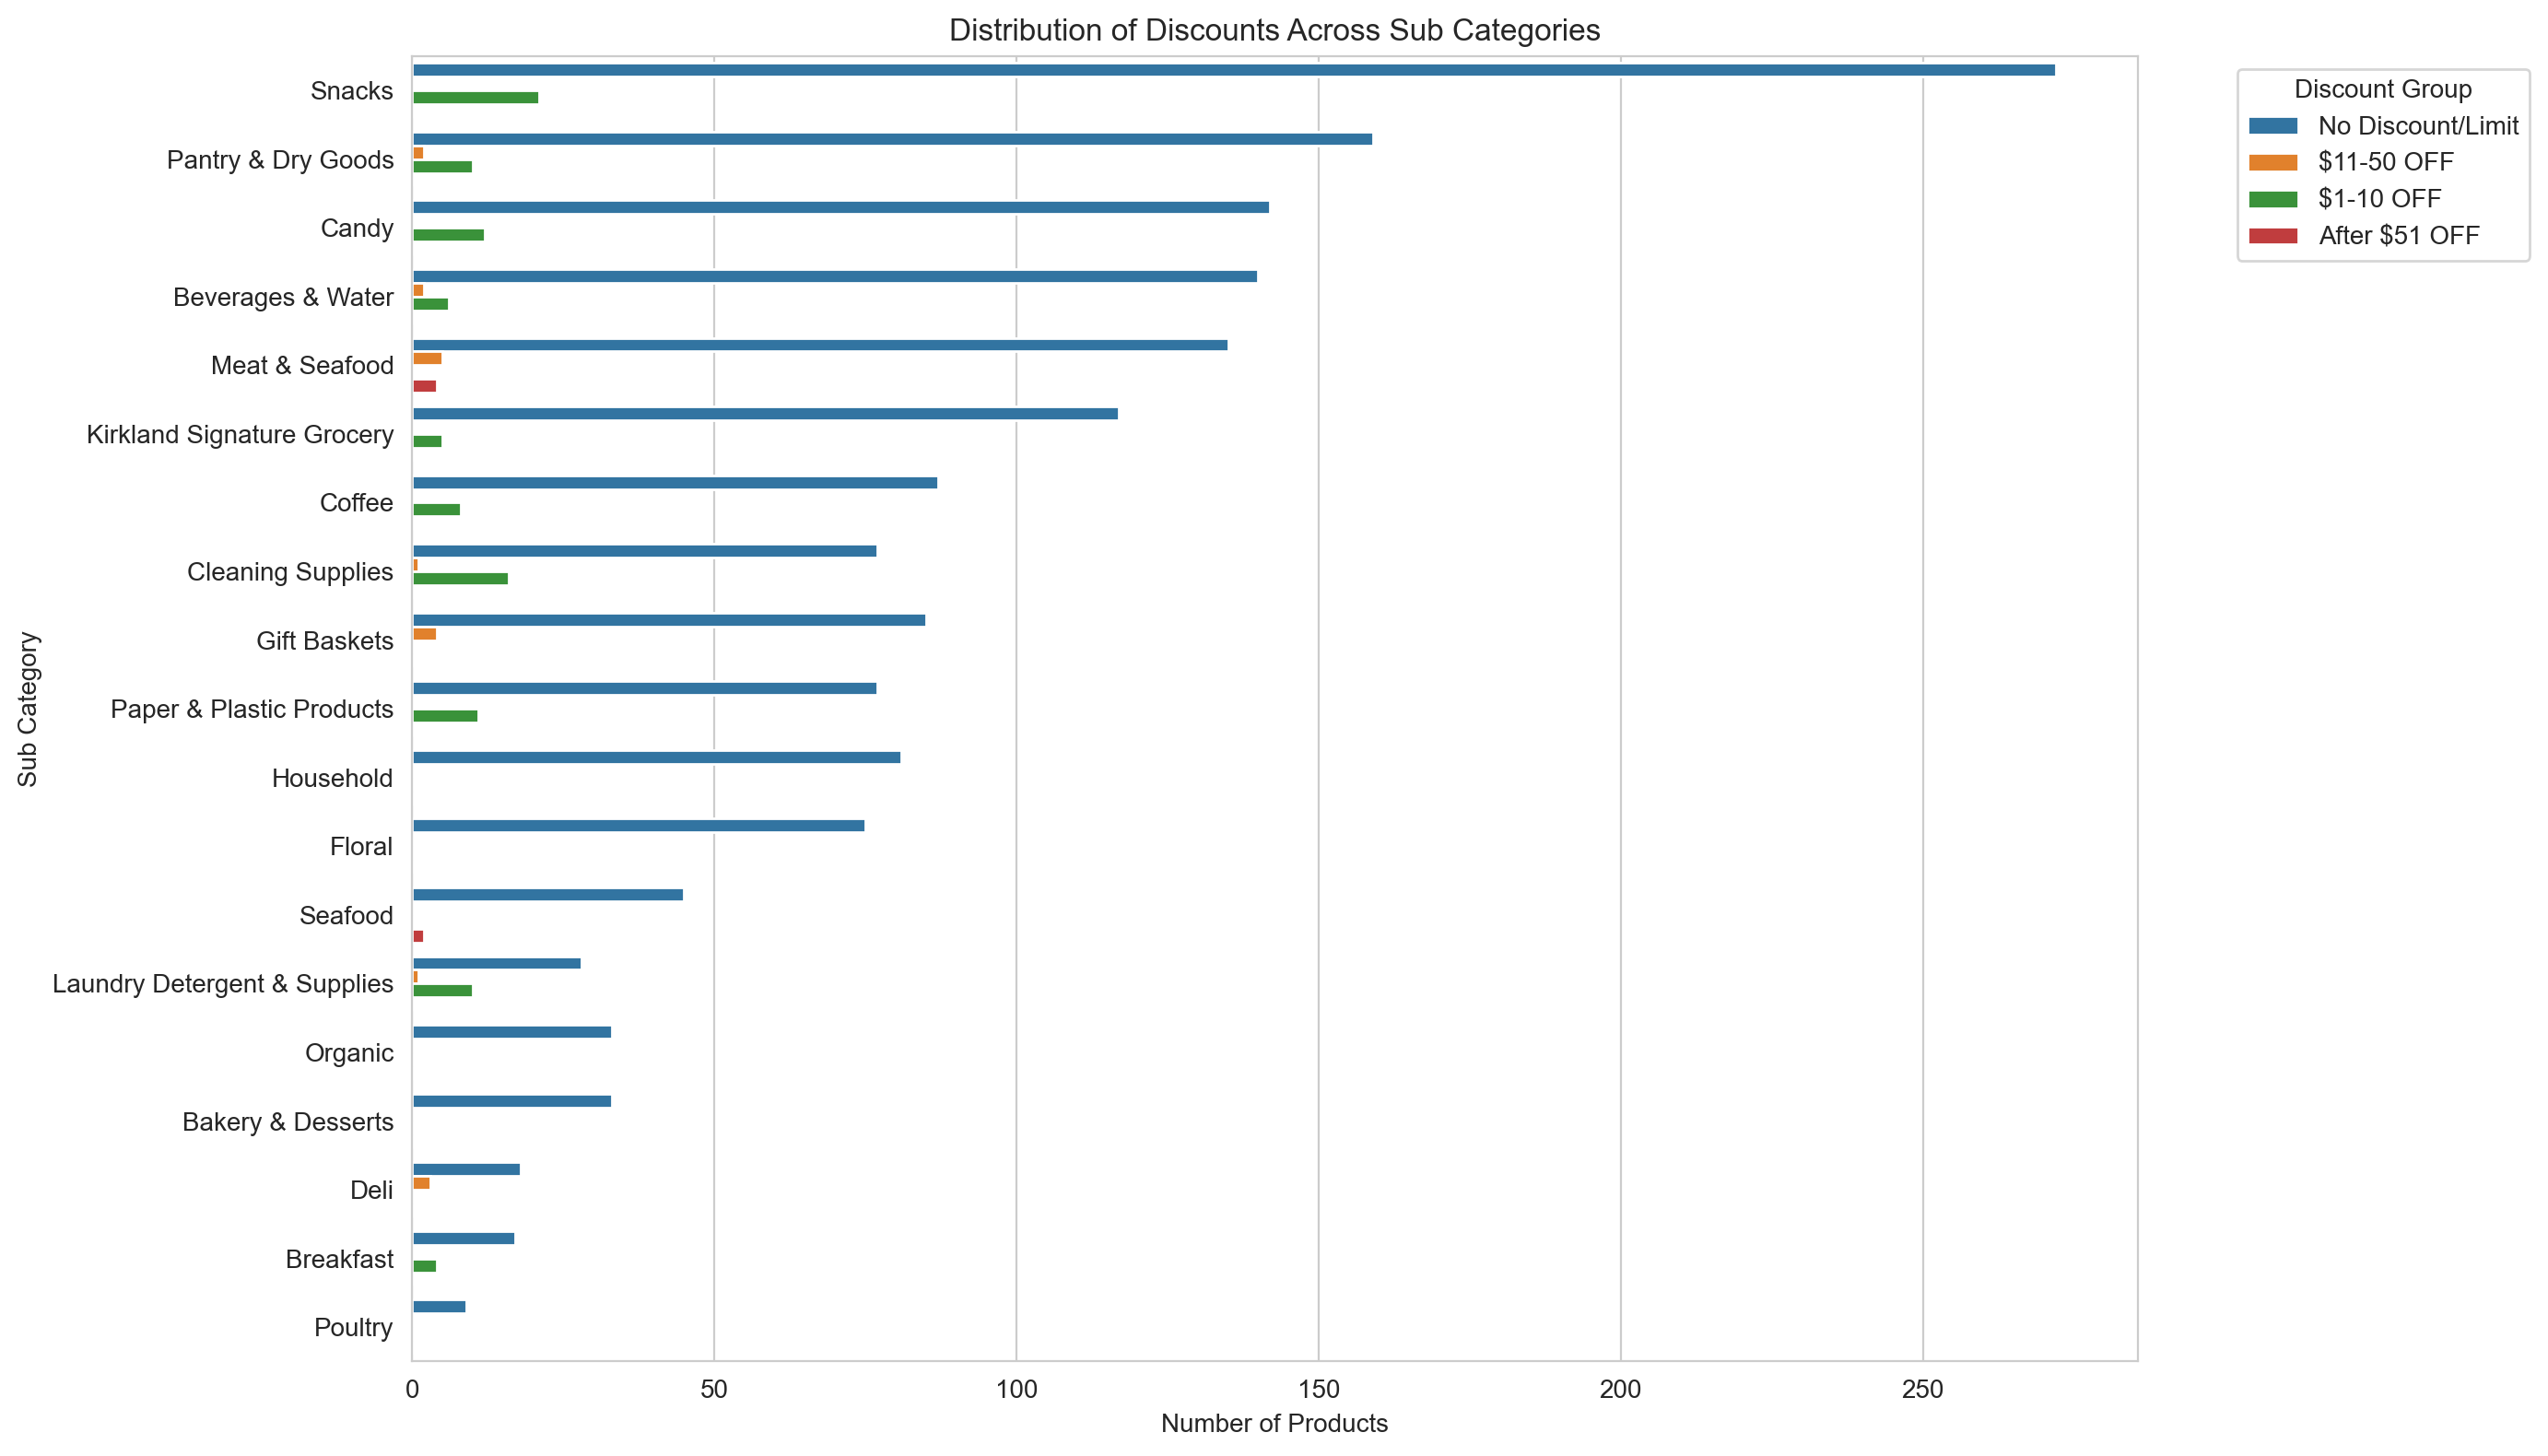

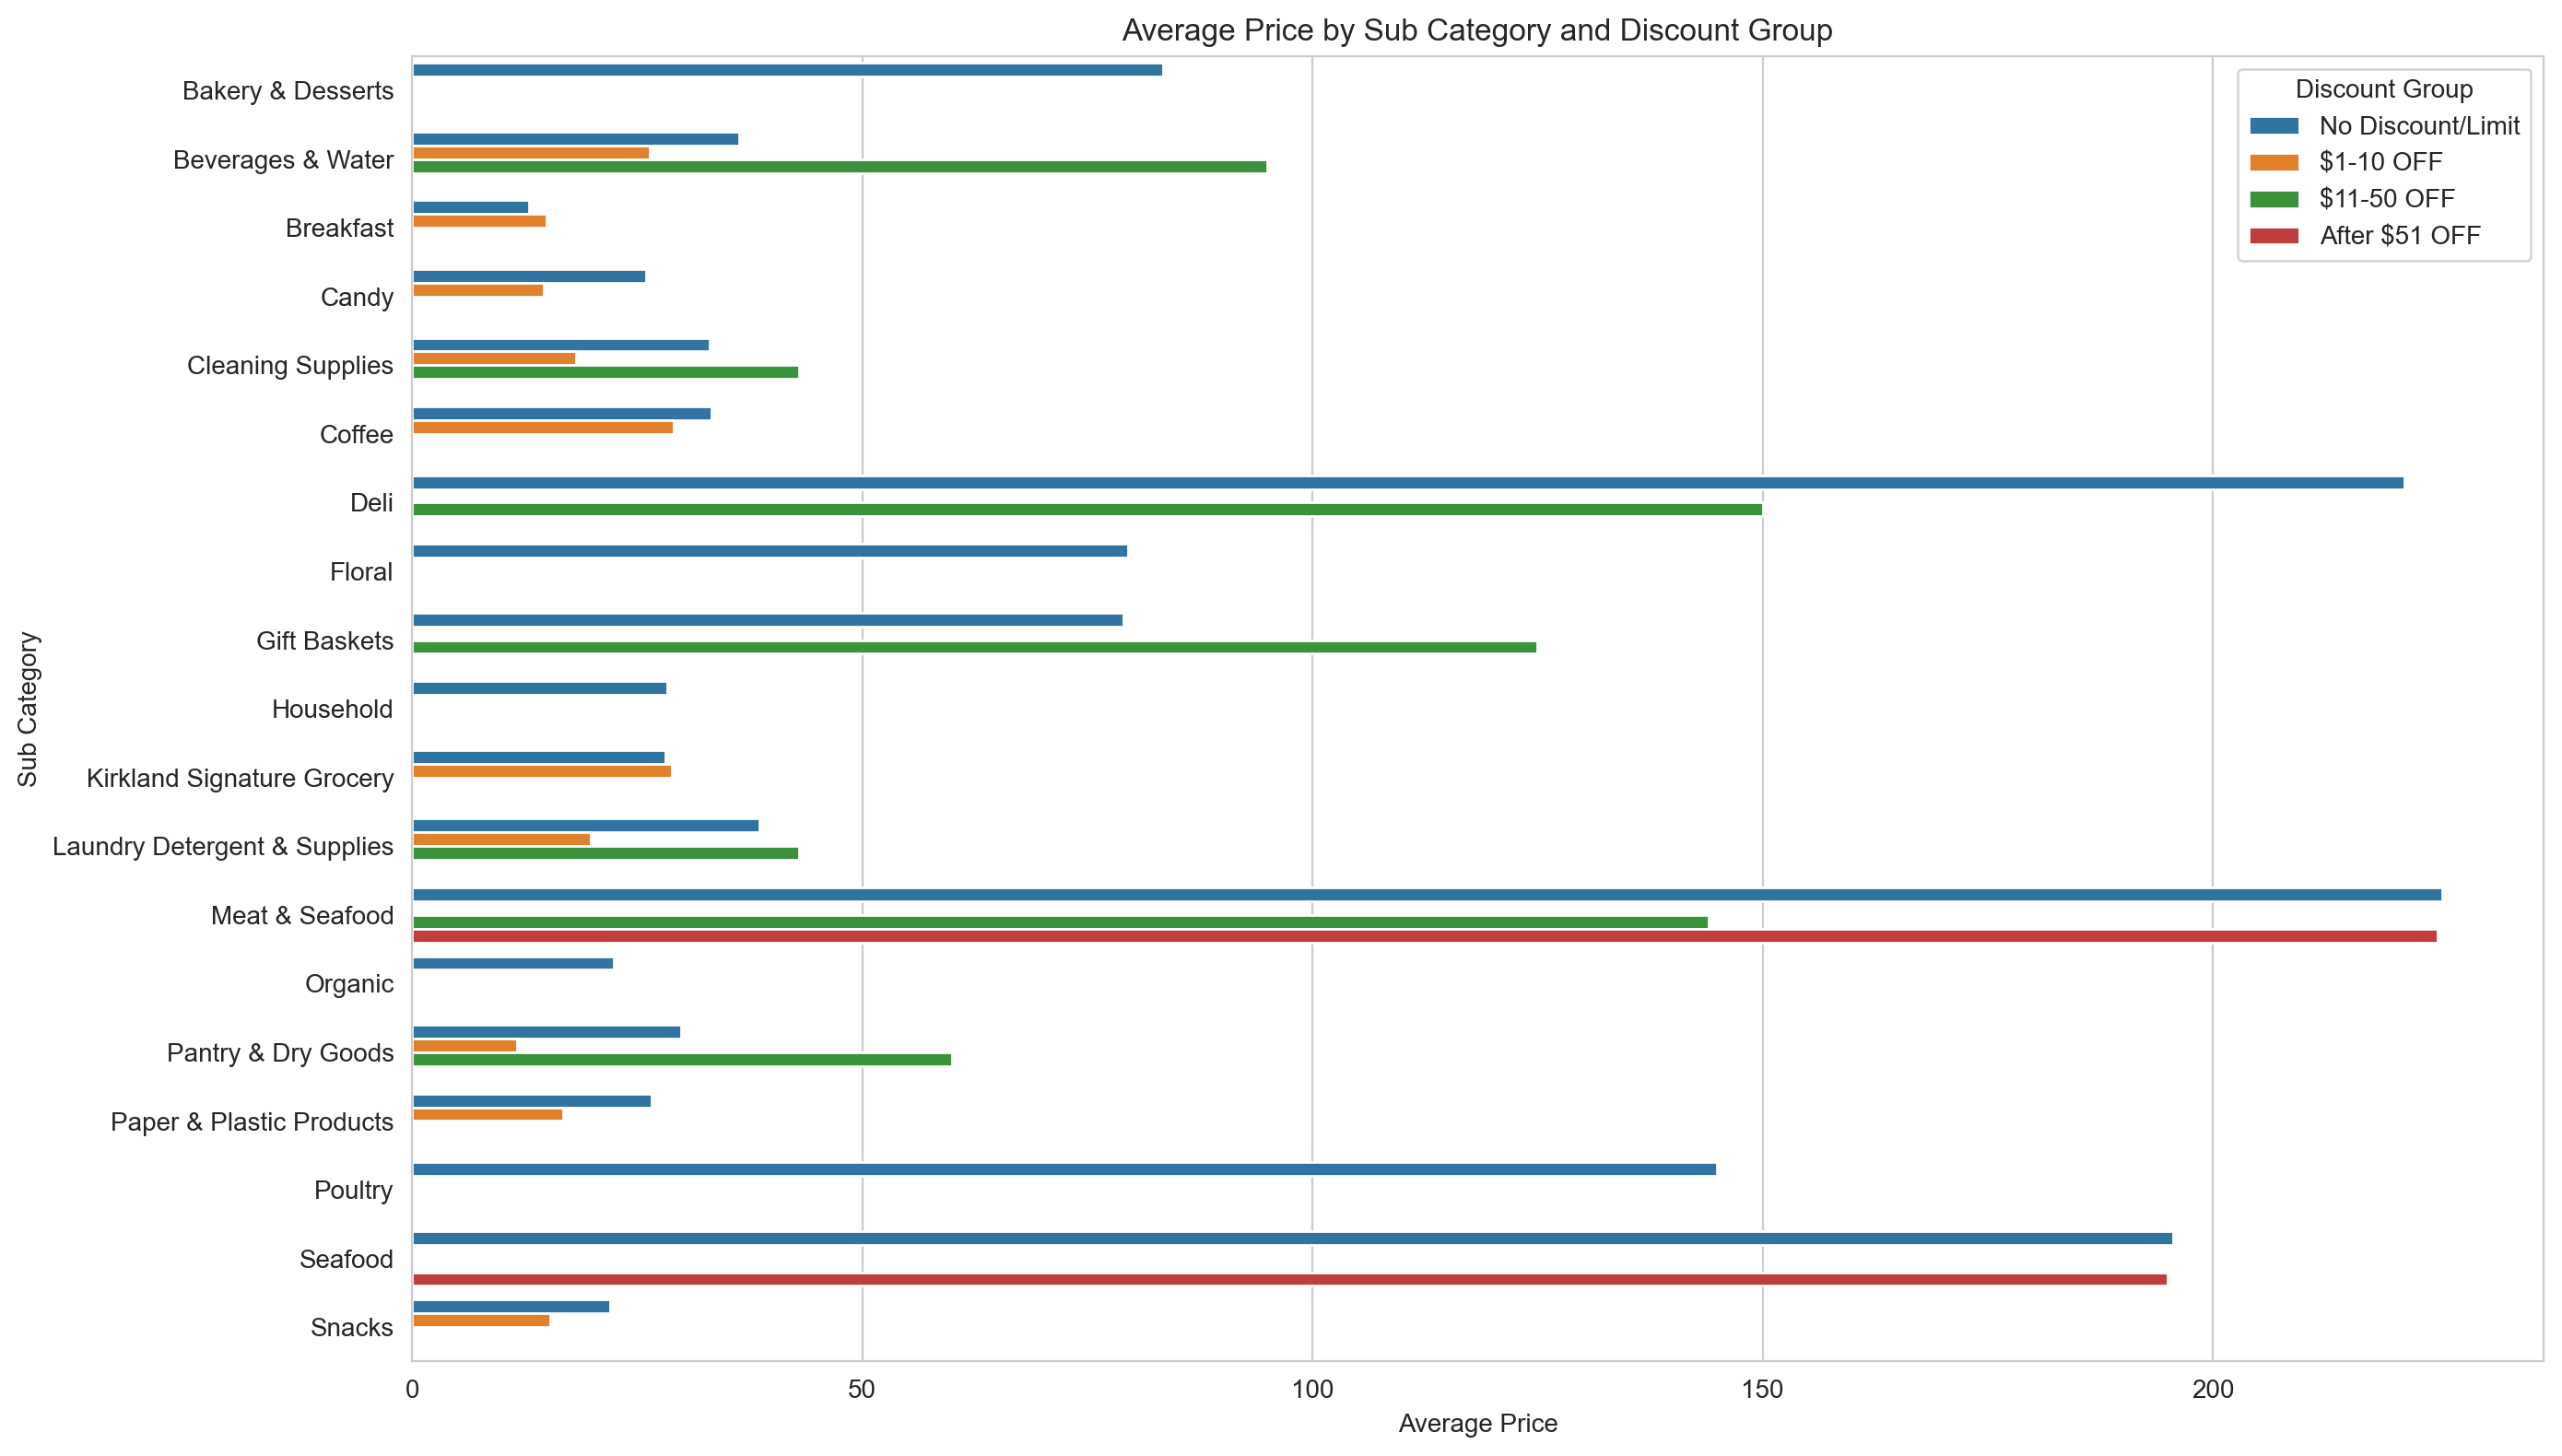

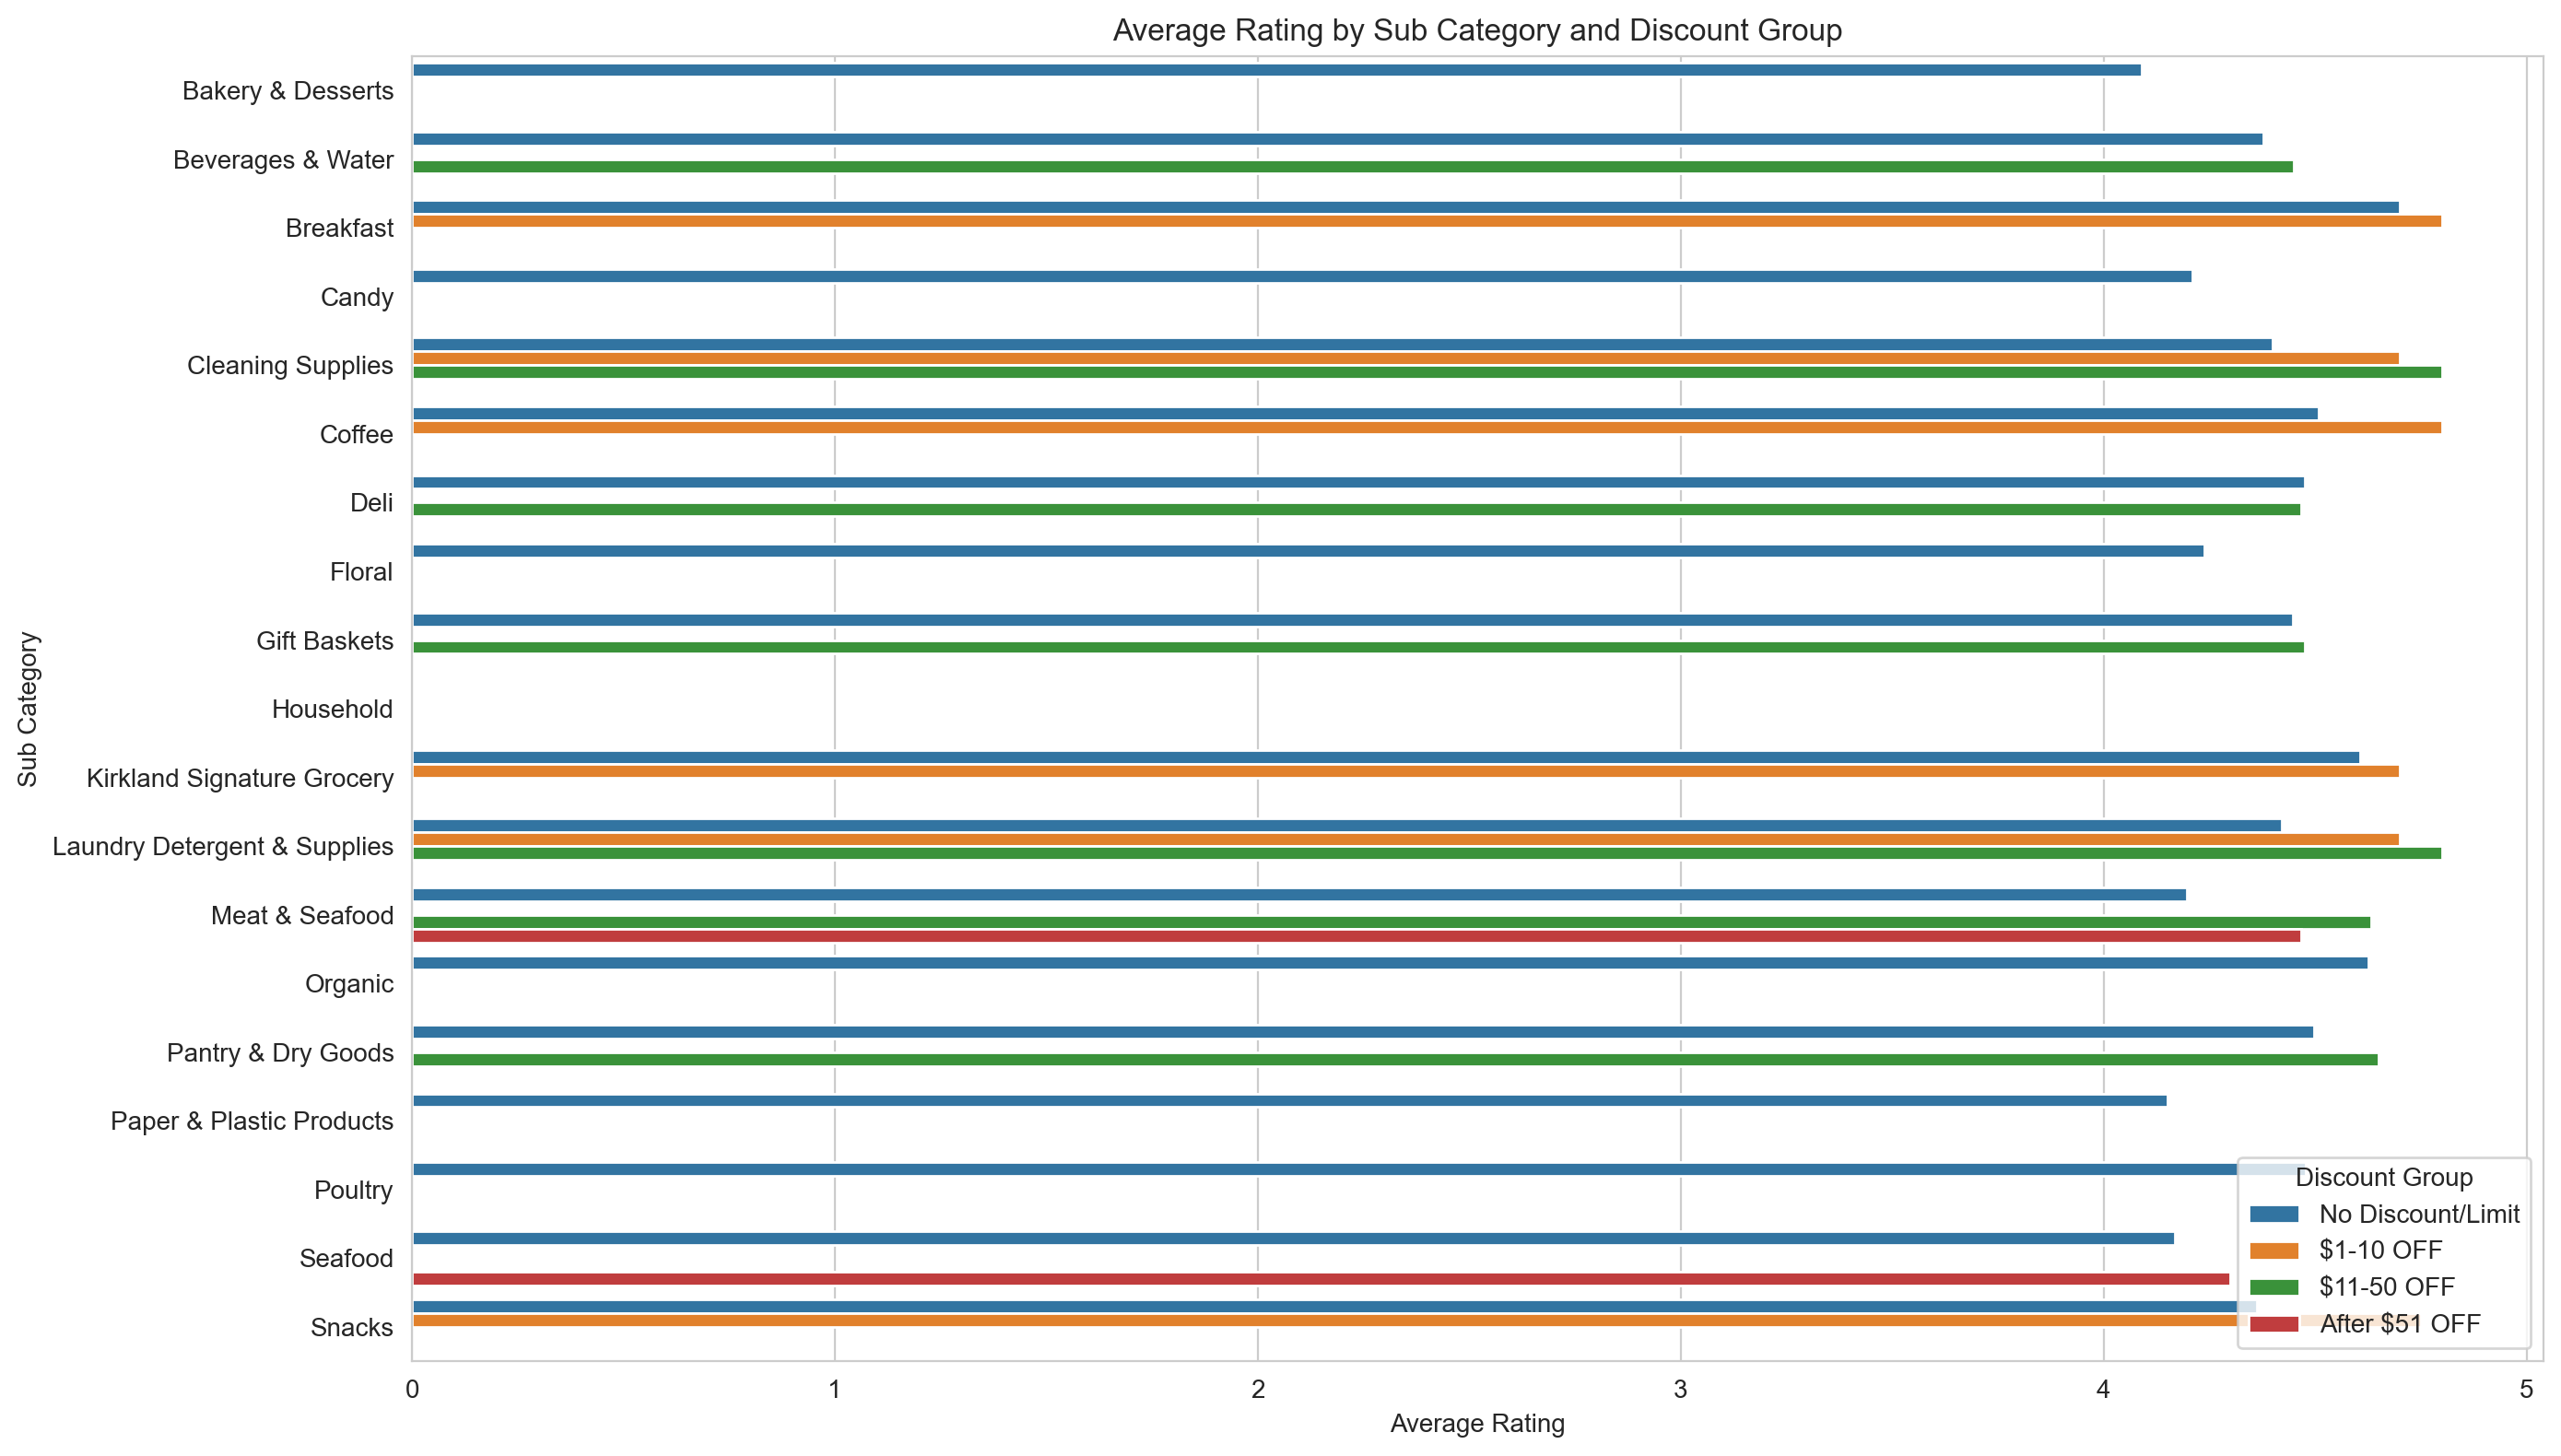

In [57]:
plt.figure(figsize=(14, 8), dpi=200)

# Distribution of Discounts Across Sub Categories
sns.countplot(y='Sub Category', hue='Discount_Group', data=data_cleaned,
              order=data_cleaned['Sub Category'].value_counts().index)
plt.title('Distribution of Discounts Across Sub Categories')
plt.xlabel('Number of Products')
plt.ylabel('Sub Category')
plt.legend(title='Discount Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Preparing data for price and rating comparison
price_rating_by_subcat_discount = data_cleaned.groupby(['Sub Category', 'Discount_Group']).agg(
    Average_Price=('Price', 'mean'),
    Average_Rating=('Average_Rating', 'mean')
).reset_index()

# Price Comparison by Sub Category and Discount Group
plt.figure(figsize=(14, 8), dpi=200)
sns.barplot(x='Average_Price', y='Sub Category', hue='Discount_Group', data=price_rating_by_subcat_discount)
plt.title('Average Price by Sub Category and Discount Group')
plt.xlabel('Average Price')
plt.ylabel('Sub Category')
plt.legend(title='Discount Group')

plt.tight_layout()
plt.show()

# Average Rating Comparison by Sub Category and Discount Group
plt.figure(figsize=(14, 8), dpi=200)
sns.barplot(x='Average_Rating', y='Sub Category', hue='Discount_Group', data=price_rating_by_subcat_discount)
plt.title('Average Rating by Sub Category and Discount Group')
plt.xlabel('Average Rating')
plt.ylabel('Sub Category')
plt.legend(title='Discount Group')

plt.tight_layout()
plt.show()


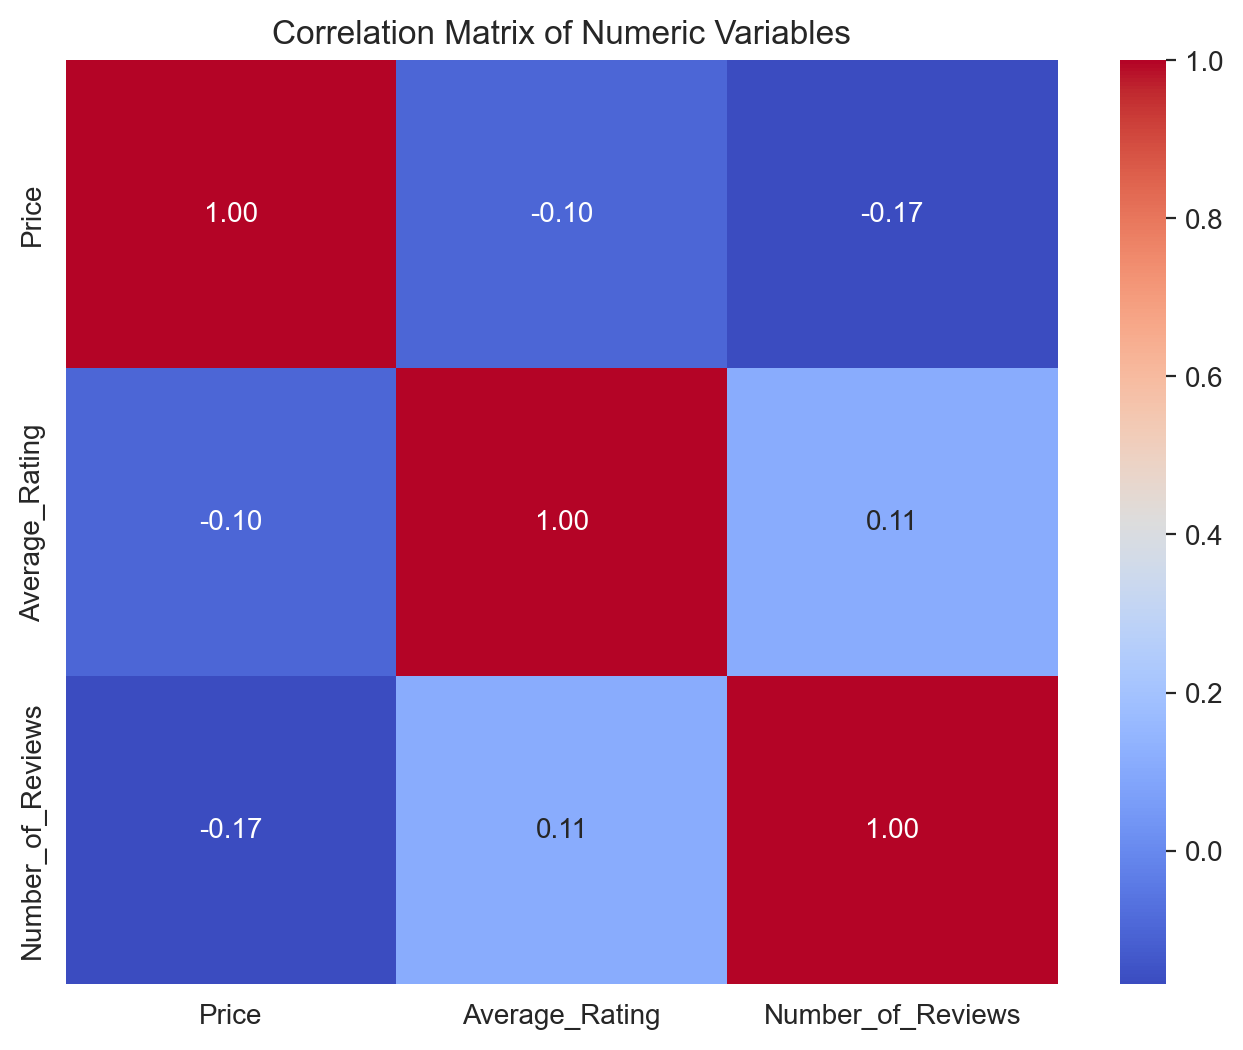

In [59]:
# Selecting numeric variables for correlation analysis
numeric_vars = data_cleaned[['Price', 'Average_Rating', 'Number_of_Reviews']]

# Calculating correlation matrix
correlation_matrix = numeric_vars.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6), dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [61]:
# Reload the original dataset to get 'Feature' and 'Product Description' columns
data_original = pd.read_csv(file_path)

# Quick check to ensure we have the desired columns
data_original[['Feature', 'Product Description']].head()


,Feature,Product Description
0,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [62]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

# Function to calculate sentiment subjectivity
def calculate_subjectivity(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None

# Apply the functions to the 'Product Description' column
data_original['Description_Polarity'] = data_original['Product Description'].apply(calculate_polarity)
data_original['Description_Subjectivity'] = data_original['Product Description'].apply(calculate_subjectivity)

# Display the first few rows to verify sentiment scores
data_original[['Product Description', 'Description_Polarity', 'Description_Subjectivity']].head()


,Product Description,Description_Polarity,Description_Subjectivity
0,A cake the dessert epicure will die for!Our To...,0.303750,0.680000
1,"Due to the perishable nature of this item, ord...",0.392817,0.711151
2,Moist and buttery sponge cakes with the tradit...,0.061012,0.355357
3,These delectable butter pecan meltaways are th...,0.233036,0.639286
4,A cake the dessert epicure will die for!To the...,0.314773,0.690909


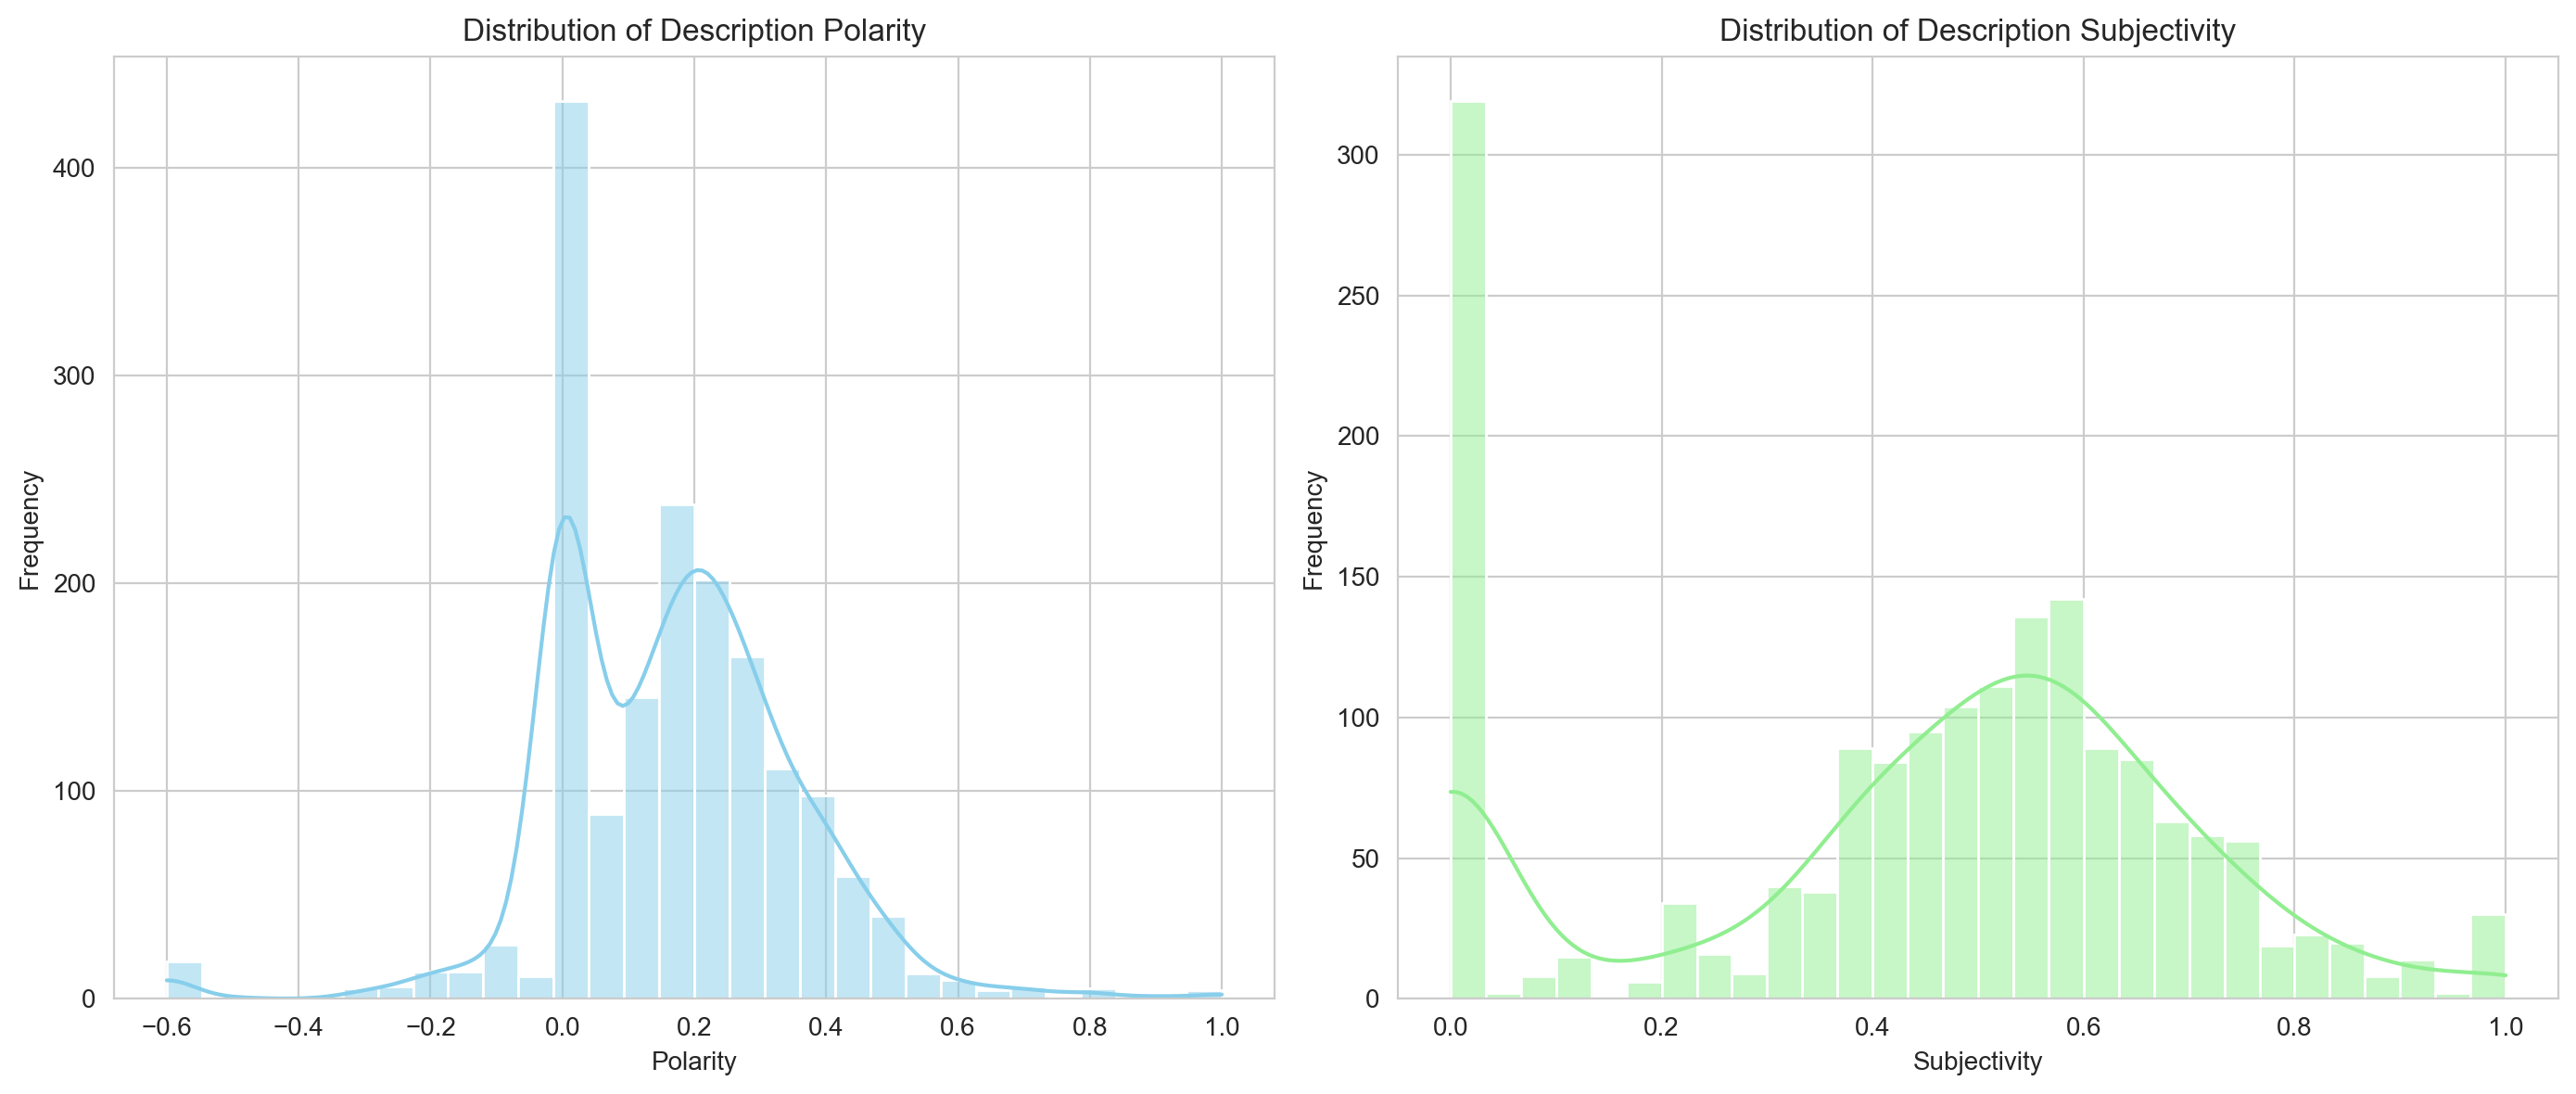

In [63]:
plt.figure(figsize=(14, 6), dpi=200)

# Histogram of Description Polarity
plt.subplot(1, 2, 1)
sns.histplot(data_original['Description_Polarity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Description Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Histogram of Description Subjectivity
plt.subplot(1, 2, 2)
sns.histplot(data_original['Description_Subjectivity'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Description Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


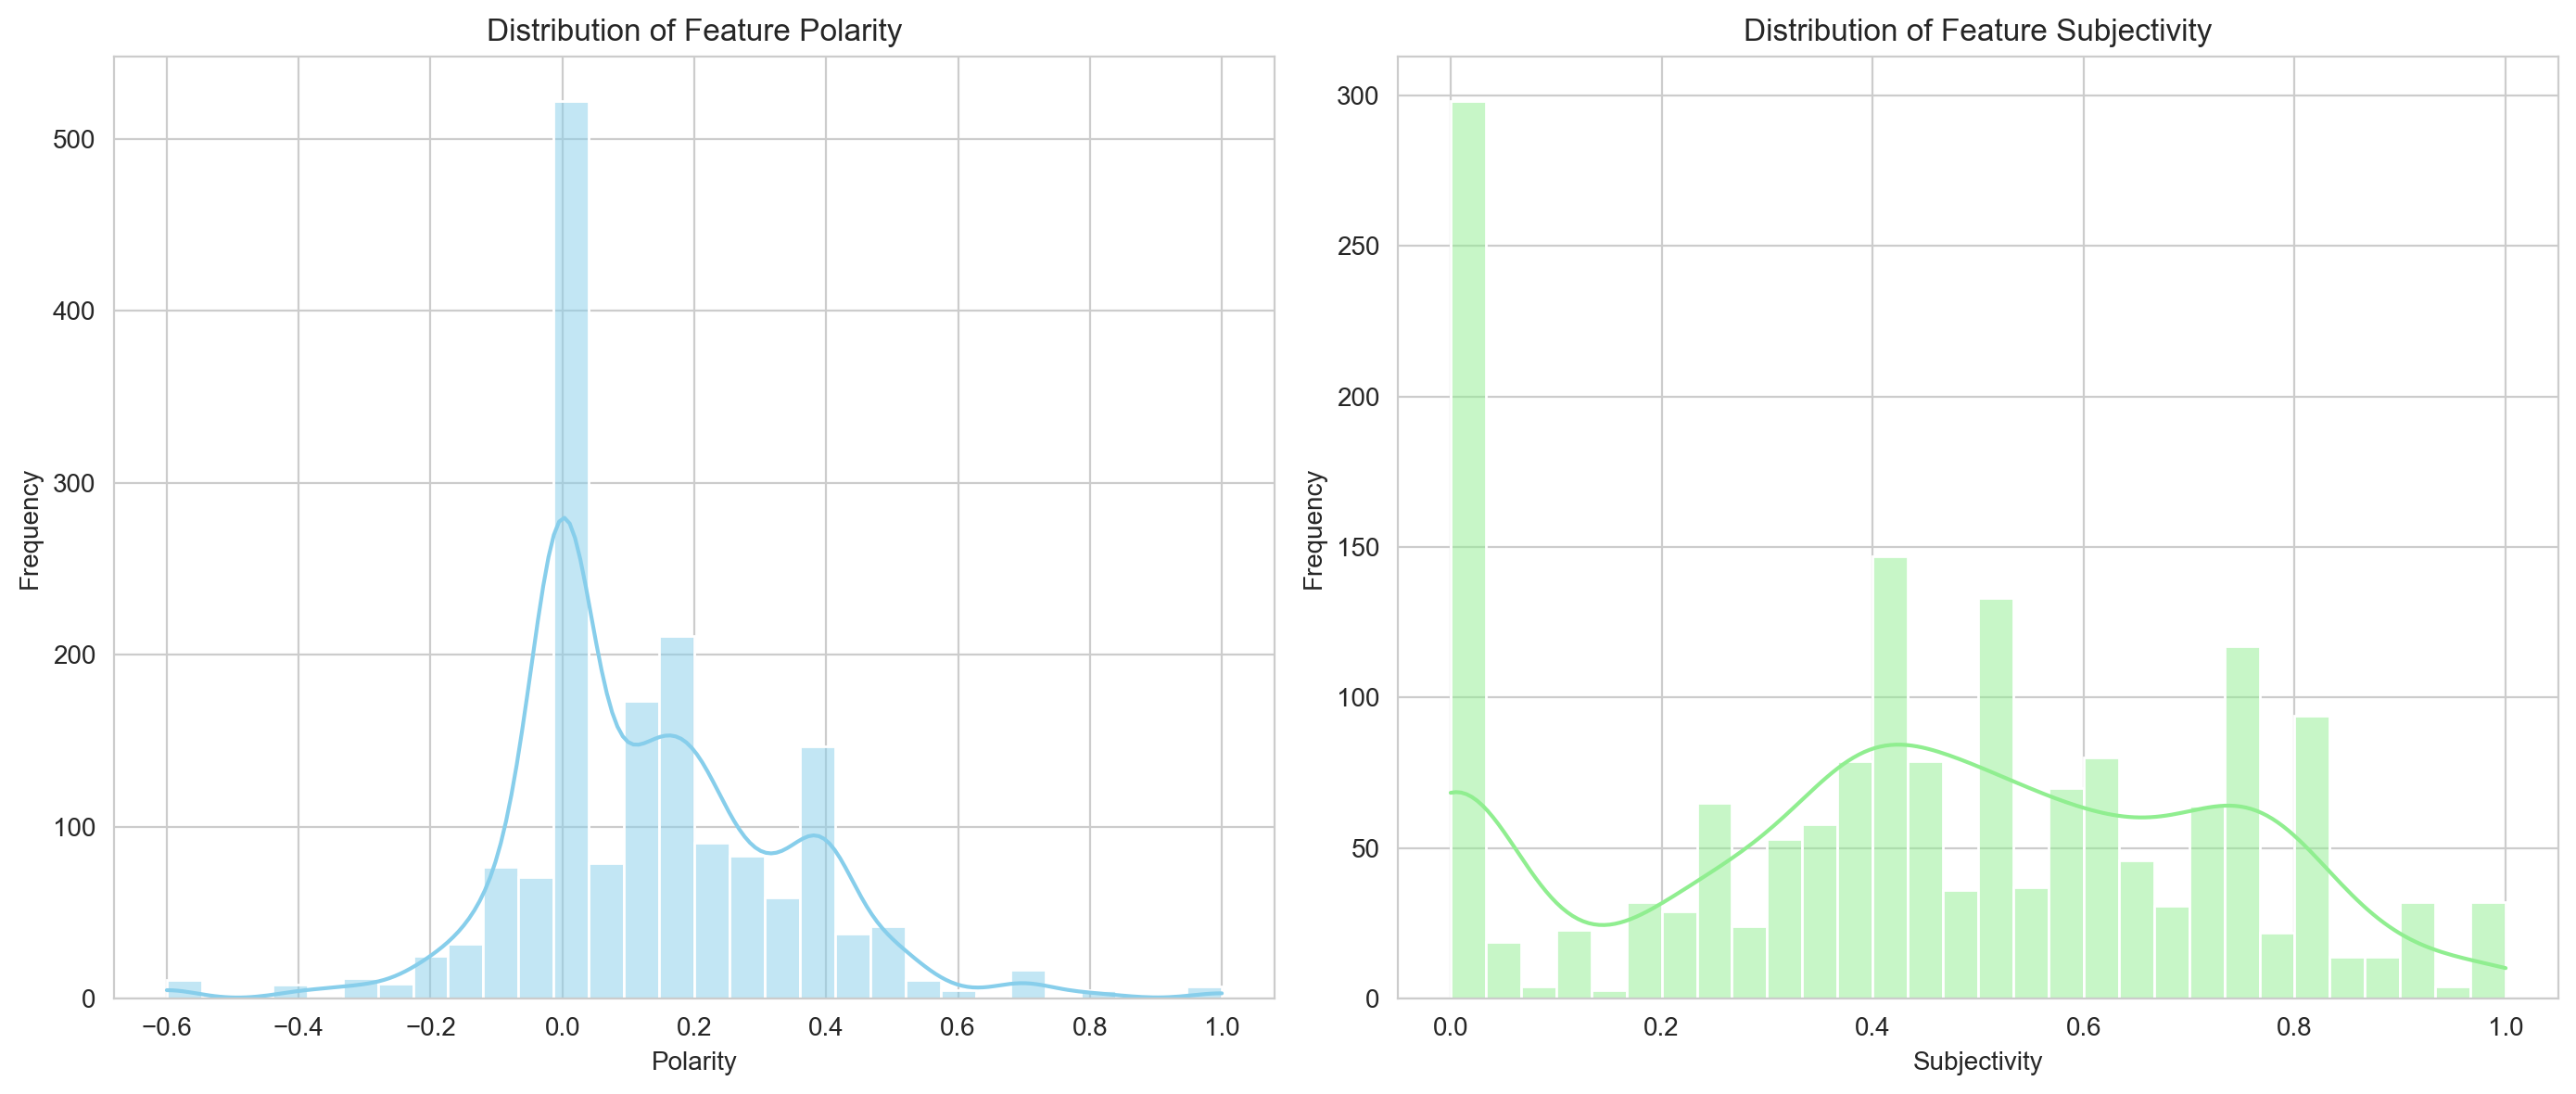

In [64]:
# Apply the sentiment analysis functions to the 'Feature' column
data_original['Feature_Polarity'] = data_original['Feature'].apply(calculate_polarity)
data_original['Feature_Subjectivity'] = data_original['Feature'].apply(calculate_subjectivity)

# Visualizing the sentiment analysis results for the 'Feature' column
plt.figure(figsize=(14, 6), dpi=200)

# Histogram of Feature Polarity
plt.subplot(1, 2, 1)
sns.histplot(data_original['Feature_Polarity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Feature Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Histogram of Feature Subjectivity
plt.subplot(1, 2, 2)
sns.histplot(data_original['Feature_Subjectivity'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Feature Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
